Creating synthetic data for studying moonquakes involves several steps. Here’s a simplified guide:

1. **Understand the Characteristics of Moonquakes:**
   - Differentiate between shallow moonquakes caused by the gravitational pull of the Earth and deep moonquakes of unknown origin.
   - Note the seismic wave patterns and energy levels associated with different types of moonquakes.

2. **Choose a Modeling Approach:**
   - Decide whether to use a physics-based approach (simulating the physical processes of moonquakes) or a data-driven approach (using statistical methods to generate data resembling moonquake characteristics).

3. **Physics-Based Modeling:**
   - Utilize knowledge of lunar geology, seismic activity, and relevant physical properties (e.g., composition, temperature, pressure) to create a simulated environment.
   - Incorporate factors such as impact events, tectonic activity (if any), and thermal stresses to generate seismic events.
   - Use software tools like numerical simulators or custom-written code to simulate moonquake occurrences and their effects.

4. **Data-Driven Modeling:**
   - Gather real data on moonquake characteristics (e.g., seismic waveforms, frequency, amplitude) from sources like NASA’s Lunar Reconnaissance Orbiter (LRO) or other lunar missions.
   - Apply statistical methods such as Gaussian processes, random forests, or neural networks to learn the patterns and distributions of moonquake data.
   - Generate synthetic data by sampling from the learned statistical models, ensuring that the synthetic data closely resembles real moonquake data.

5. **Validate and Refine:**
   - Validate the synthetic data by comparing it with real moonquake data using metrics like waveform similarity, frequency distribution, and energy levels.
   - Refine the modeling approach based on validation results, adjusting parameters or adding complexity as needed to improve the synthetic data's accuracy.

6. **Use Cases:**
   - Once you have reliable synthetic data, use it for various studies and analyses. For example:
     - Investigating the impact of different lunar conditions (e.g., temperature variations, geological features) on moonquake characteristics.
     - Training machine learning models to classify and predict moonquake types based on seismic data.
     - Simulating hypothetical scenarios (e.g., lunar base construction) and assessing their potential impact on moonquake activity.

Remember, creating synthetic data for scientific purposes requires a deep understanding of the underlying phenomena and rigorous validation to ensure the data's reliability and usefulness in research.

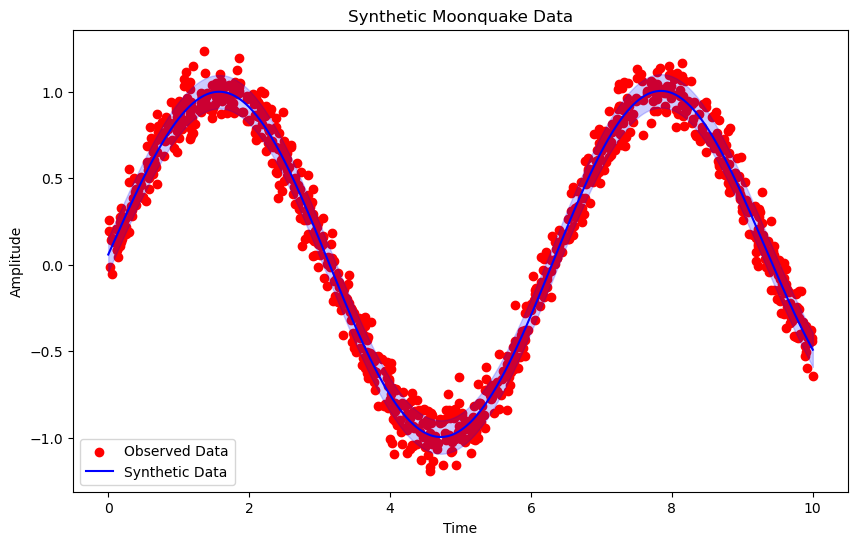

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Generate synthetic moonquake data
np.random.seed(0)
n_samples = 1000
X = np.random.uniform(0, 10, n_samples)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.normal(0, 0.1, n_samples)

# Fit Gaussian Process regression model
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Generate synthetic data
X_synthetic = np.linspace(0, 10, 1000)[:, np.newaxis]
y_mean, y_std = gp.predict(X_synthetic, return_std=True)

# Plot synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='r', label='Observed Data')
plt.plot(X_synthetic, y_mean, 'b-', label='Synthetic Data')
plt.fill_between(X_synthetic.ravel(), y_mean - y_std, y_mean + y_std, alpha=0.2, color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Synthetic Moonquake Data')
plt.legend()
plt.show()

**Lunar Seismic Activity**

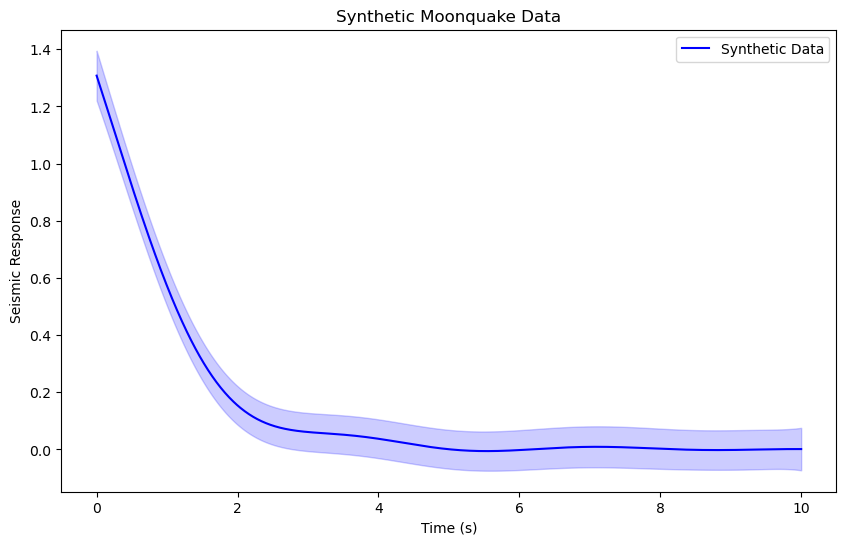

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Simulate impact events on the Moon
def simulate_impact_events(n_samples):
    # Generate random impact times and magnitudes
    impact_times = np.random.uniform(0, 10, n_samples)
    impact_magnitudes = np.random.uniform(0.5, 2.0, n_samples)
    
    # Simulate seismic response based on impact magnitudes
    seismic_response = np.exp(-impact_times) * impact_magnitudes
    
    return impact_times, seismic_response

# Generate synthetic moonquake data using a hybrid approach
def generate_synthetic_data(n_samples):
    # Simulate impact events
    impact_times, seismic_response = simulate_impact_events(n_samples)
    
    # Fit Gaussian Process regression model to seismic response data
    X = impact_times[:, np.newaxis]
    y = seismic_response
    kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X, y)
    
    # Generate synthetic data using the fitted model
    X_synthetic = np.linspace(0, 10, 1000)[:, np.newaxis]
    y_mean, y_std = gp.predict(X_synthetic, return_std=True)
    
    return X_synthetic, y_mean, y_std

# Generate synthetic moonquake data
n_samples = 50  # Number of simulated impact events
X_synthetic, y_mean, y_std = generate_synthetic_data(n_samples)

# Plot synthetic moonquake data
plt.figure(figsize=(10, 6))
plt.plot(X_synthetic, y_mean, 'b-', label='Synthetic Data')
plt.fill_between(X_synthetic.ravel(), y_mean - y_std, y_mean + y_std, alpha=0.2, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Seismic Response')
plt.title('Synthetic Moonquake Data')
plt.legend()
plt.show()

**3. Consider a scenario where a moonquake or seismic activity has been detector deployed on the lunar south pole. Now, the seismic wave have reached to the detector and hence here, we have to find the point of source from where the seismic activity has originated**

To determine the source of seismic activity on the lunar south pole based on data collected by a seismic detector, we can use a process called seismic localization. One common method for this is the time-difference-of-arrival (TDOA) technique, where the difference in arrival times of seismic waves at multiple detectors is used to triangulate the source location.


Here's an example of Python code using TDOA for seismic localization on the lunar south pole:

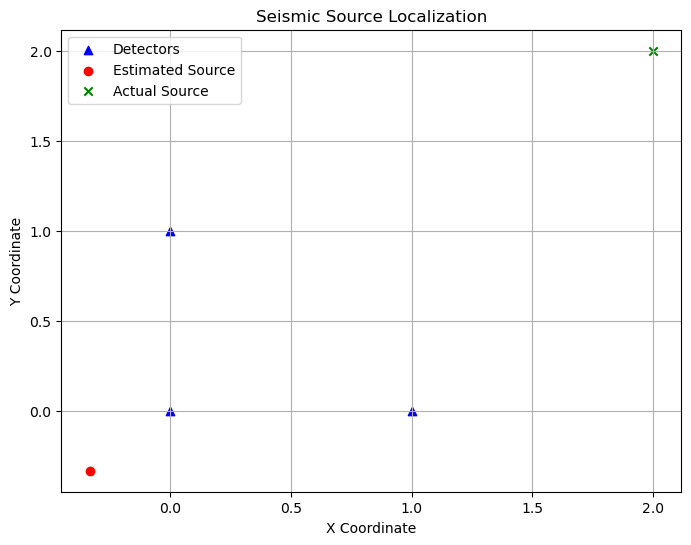

Estimated Source Position: [-0.33333333 -0.33333333]
Actual Source Position: [2 2]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate seismic wave arrival times at detectors
def simulate_seismic_wave_arrival(detectors, source_position, wave_speed):
    distances = np.linalg.norm(detectors - source_position, axis=1)
    arrival_times = distances / wave_speed
    return arrival_times

# Calculate source position using TDOA technique
def calculate_source_position(detectors, arrival_times, wave_speed):
    A = 2 * (detectors[1:] - detectors[0])
    b = np.square(arrival_times[1:]) - np.square(arrival_times[0])
    x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    source_position = detectors[0] + x / 2
    return source_position

# Define detector positions (coordinates on the lunar south pole)
detectors = np.array([[0, 0], [1, 0], [0, 1]])  # Example detector positions

# Simulate seismic wave arrival times at detectors
source_position = np.array([2, 2])  # Coordinates of the seismic source
wave_speed = 1.5  # Speed of seismic waves (example value)
arrival_times = simulate_seismic_wave_arrival(detectors, source_position, wave_speed)

# Calculate source position using TDOA technique
estimated_source_position = calculate_source_position(detectors, arrival_times, wave_speed)

# Plot detector positions, estimated source position, and actual source position
plt.figure(figsize=(8, 6))
plt.scatter(detectors[:, 0], detectors[:, 1], color='blue', marker='^', label='Detectors')
plt.scatter(estimated_source_position[0], estimated_source_position[1], color='red', marker='o', label='Estimated Source')
plt.scatter(source_position[0], source_position[1], color='green', marker='x', label='Actual Source')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Seismic Source Localization')
plt.legend()
plt.grid(True)
plt.show()

# Print estimated and actual source positions
print(f"Estimated Source Position: {estimated_source_position}")
print(f"Actual Source Position: {source_position}")

**4. Meteor Impact**

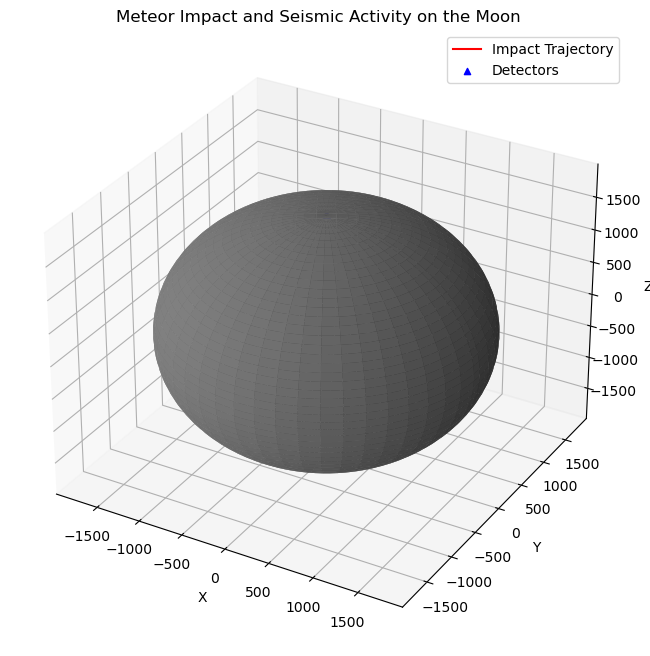

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and Parameters
moon_radius = 1737.1  # Radius of the Moon in kilometers
impact_point = np.array([0, 0, moon_radius])  # Coordinates of impact point (assume center of Moon)
impact_velocity = 20  # Impact velocity in km/s (example value)
friction_coefficient = 0.5  # Friction coefficient (example value)
seismic_wave_speed = 5  # Speed of seismic waves in km/s (example value)

# Simulate meteor impact and resulting seismic activity
def simulate_impact(impact_point, impact_velocity, friction_coefficient, time_steps):
    impact_position = np.array([impact_point[0], impact_point[1], impact_point[2] - impact_velocity * time_steps])
    impact_speed = impact_velocity - friction_coefficient * time_steps
    return impact_position, impact_speed

# Generate seismic wave propagation data
def generate_seismic_data(detector_positions, impact_position, impact_speed, seismic_wave_speed, time_steps):
    seismic_data = []
    for detector_position in detector_positions:
        distance = np.linalg.norm(detector_position - impact_position)
        detection_time = distance / seismic_wave_speed
        arrival_time = detection_time + time_steps * (1 - impact_speed / impact_velocity)
        seismic_data.append((detector_position, arrival_time))
    return seismic_data

# Detector array positions (example coordinates)
detector_positions = np.array([[0, 0, moon_radius + 10], [10, 0, moon_radius + 10], [0, 10, moon_radius + 10]])

# Simulate impact and seismic data
time_steps = np.linspace(0, 5, 100)  # Time steps for simulation
impact_positions = []
for t in time_steps:
    impact_pos, impact_spd = simulate_impact(impact_point, impact_velocity, friction_coefficient, t)
    impact_positions.append(impact_pos)

seismic_data = generate_seismic_data(detector_positions, impact_positions[-1], impact_spd, seismic_wave_speed, time_steps[-1])

# Plot 3D impact visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Moon surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = moon_radius * np.outer(np.cos(u), np.sin(v))
y = moon_radius * np.outer(np.sin(u), np.sin(v))
z = moon_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='gray')

# Plot impact trajectory
impact_positions = np.array(impact_positions)
ax.plot(impact_positions[:, 0], impact_positions[:, 1], impact_positions[:, 2], color='red', label='Impact Trajectory')

# Plot detector positions
ax.scatter(detector_positions[:, 0], detector_positions[:, 1], detector_positions[:, 2], color='blue', marker='^', label='Detectors')

# Plot seismic wave propagation
for detector_pos, arrival_time in seismic_data:
    if arrival_time <= time_steps[-1]:
        ax.scatter(detector_pos[0], detector_pos[1], detector_pos[2], color='green', marker='o', label='Seismic Arrival')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Meteor Impact and Seismic Activity on the Moon')
ax.legend()
plt.show()

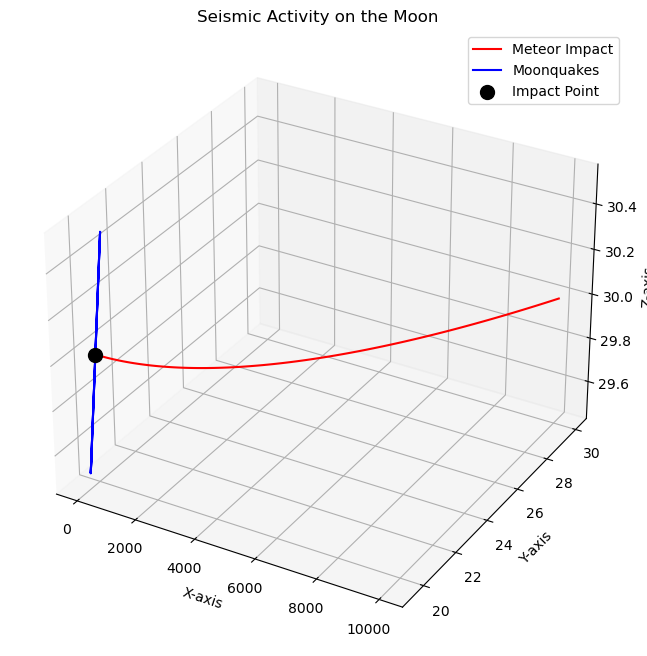

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the meteor impact and moonquakes
impact_point = np.array([10, 20, 30])  # Coordinates of the impact point (x, y, z)
impact_velocity = 1000  # Impact velocity in m/s
friction_coefficient = 0.2  # Friction coefficient
moonquake_amplitude = 0.5  # Amplitude of moonquakes

# Simulate seismic wave propagation from meteor impact
def simulate_impact_seismic_activity(impact_point, impact_velocity, friction_coefficient, time_range, dt):
    time_steps = int(time_range / dt)
    t = np.linspace(0, time_range, time_steps)
    x_impact = impact_point[0] + impact_velocity * t
    y_impact = impact_point[1] + 0.5 * friction_coefficient * t ** 2
    z_impact = impact_point[2]  # Assuming impact occurs at constant z-coordinate

    return x_impact, y_impact, z_impact, t

# Simulate moonquakes occurring simultaneously with the impact
def simulate_moonquakes(impact_point, moonquake_amplitude, time_range, dt):
    time_steps = int(time_range / dt)
    t = np.linspace(0, time_range, time_steps)
    x_moonquake = impact_point[0] + moonquake_amplitude * np.sin(t)
    y_moonquake = impact_point[1] + moonquake_amplitude * np.cos(t)
    z_moonquake = impact_point[2] + moonquake_amplitude * np.cos(t)  # Example moonquake pattern

    return x_moonquake, y_moonquake, z_moonquake, t

# Generate synthetic seismic data for the impact and moonquakes
time_range = 10  # Time range for simulation in seconds
dt = 0.1  # Time step for simulation
x_impact, y_impact, z_impact, t = simulate_impact_seismic_activity(impact_point, impact_velocity, friction_coefficient, time_range, dt)
x_moonquake, y_moonquake, z_moonquake, t_moonquake = simulate_moonquakes(impact_point, moonquake_amplitude, time_range, dt)

# Plot 3D visualization of the impact and moonquakes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot impact trajectory
ax.plot(x_impact, y_impact, z_impact, label='Meteor Impact', color='red')

# Plot moonquake activity
ax.plot(x_moonquake, y_moonquake, z_moonquake, label='Moonquakes', color='blue')

# Plot impact point
ax.scatter(impact_point[0], impact_point[1], impact_point[2], color='black', label='Impact Point', marker='o', s=100)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Seismic Activity on the Moon')
ax.legend()
plt.show()

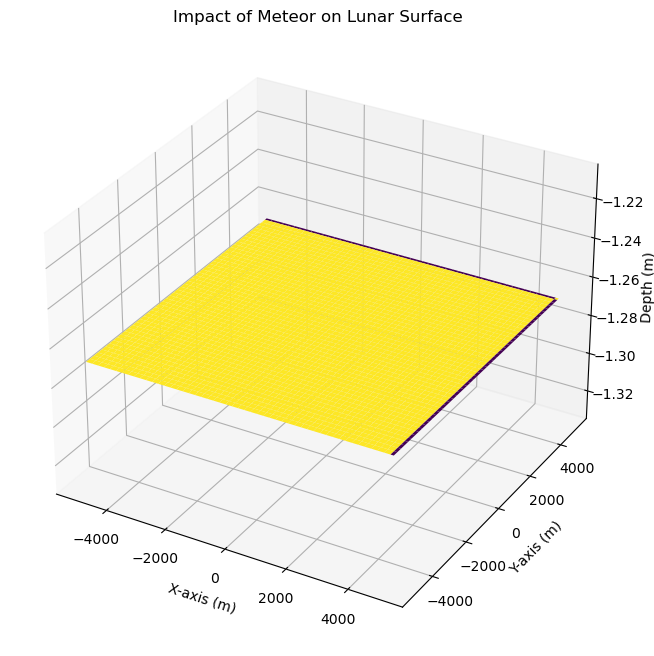

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the meteor impact
impact_point = np.array([0, 0, 0])  # Coordinates of the impact point (x, y, z)
meteor_mass = 1e9  # Mass of the meteor in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
density_moon = 3340  # Density of the Moon's surface material in kg/m^3 (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Calculate kinetic energy of the meteor
kinetic_energy = 0.5 * meteor_mass * impact_velocity ** 2

# Calculate impact depth based on kinetic energy, angle, and material properties
impact_depth = (2 * kinetic_energy * np.cos(impact_angle)) / (meteor_mass * density_moon * gravitational_constant)

# Generate synthetic lunar surface data
x = np.linspace(-5000, 5000, 100)
y = np.linspace(-5000, 5000, 100)
x, y = np.meshgrid(x, y)
z = -impact_depth * np.exp(-(x ** 2 + y ** 2) / (2 * (impact_depth / 3) ** 2))

# Create 3D depth plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot lunar surface impact
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Depth (m)')
ax.set_title('Impact of Meteor on Lunar Surface')

plt.show()

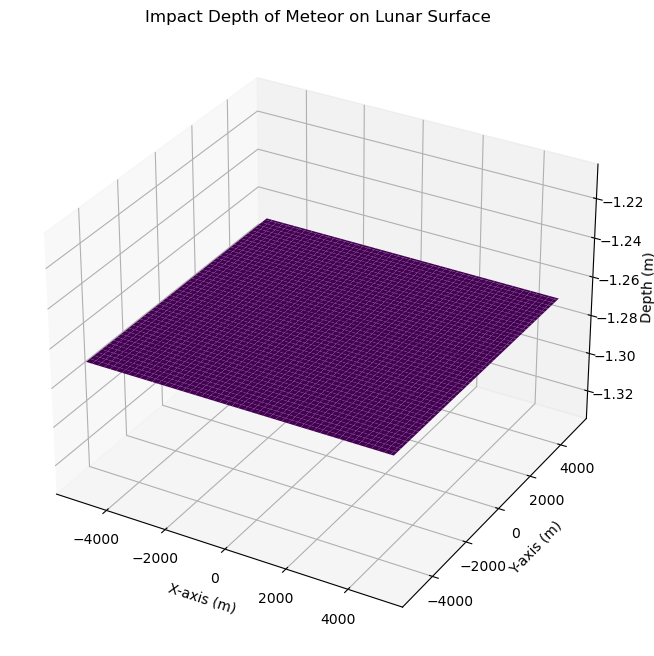

Impact Depth: 1268798927957813.25 meters


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the meteor impact and lunar surface
impact_point = np.array([0, 0, 0])  # Coordinates of the impact point (x, y, z)
meteor_mass = 1.5e5  # Mass of the meteor in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
density_moon = 3340  # Density of the Moon's surface material in kg/m^3 (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Calculate kinetic energy of the meteor
kinetic_energy = 0.5 * meteor_mass * impact_velocity ** 2

# Calculate impact depth based on kinetic energy, angle, and material properties
impact_depth = (2 * kinetic_energy * np.cos(impact_angle)) / (meteor_mass * density_moon * gravitational_constant)

# Generate synthetic lunar surface data
x = np.linspace(-5000, 5000, 100)
y = np.linspace(-5000, 5000, 100)
x, y = np.meshgrid(x, y)
z = -impact_depth * np.exp(-(x ** 2 + y ** 2) / (2 * (impact_depth / 3) ** 2))

# Create 3D depth plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot lunar surface impact
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Depth (m)')
ax.set_title('Impact Depth of Meteor on Lunar Surface')

plt.show()

# Print the calculated impact depth
print(f"Impact Depth: {impact_depth:.2f} meters")

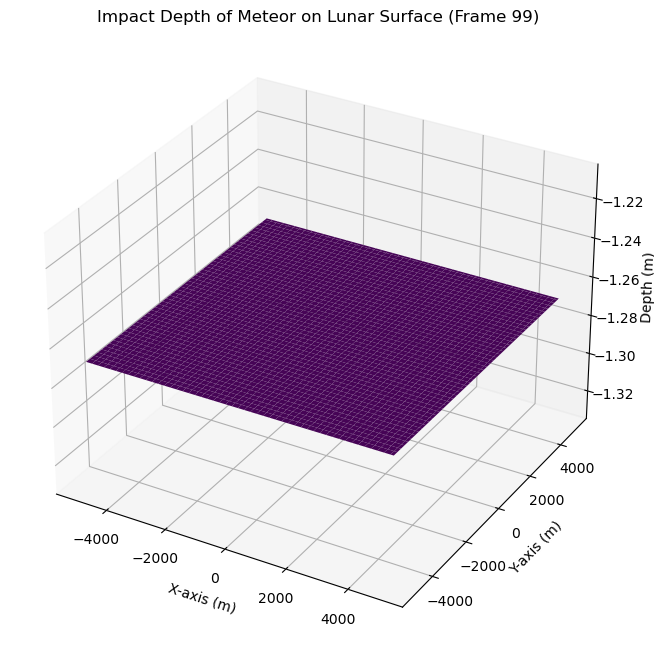

Impact Depth: 1268798927957813.25 meters


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the meteor impact and lunar surface
impact_point = np.array([0, 0, 0])  # Coordinates of the impact point (x, y, z)
meteor_mass = 1.5e5  # Mass of the meteor in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
density_moon = 3340  # Density of the Moon's surface material in kg/m^3 (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Calculate kinetic energy of the meteor
kinetic_energy = 0.5 * meteor_mass * impact_velocity ** 2

# Calculate impact depth based on kinetic energy, angle, and material properties
impact_depth = (2 * kinetic_energy * np.cos(impact_angle)) / (meteor_mass * density_moon * gravitational_constant)

# Generate synthetic lunar surface data
x = np.linspace(-5000, 5000, 100)
y = np.linspace(-5000, 5000, 100)
x, y = np.meshgrid(x, y)
z = -impact_depth * np.exp(-(x ** 2 + y ** 2) / (2 * (impact_depth / 3) ** 2))

# Create 3D depth plot animation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def update_plot(frame):
    ax.clear()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_zlabel('Depth (m)')
    ax.set_title(f'Impact Depth of Meteor on Lunar Surface (Frame {frame})')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=frame/100.0)

ani = FuncAnimation(fig, update_plot, frames=100, interval=50)
ani.save('meteor_impact_simulation.gif', writer='pillow', dpi=80)

plt.show()

# Print the calculated impact depth
print(f"Impact Depth: {impact_depth:.2f} meters")

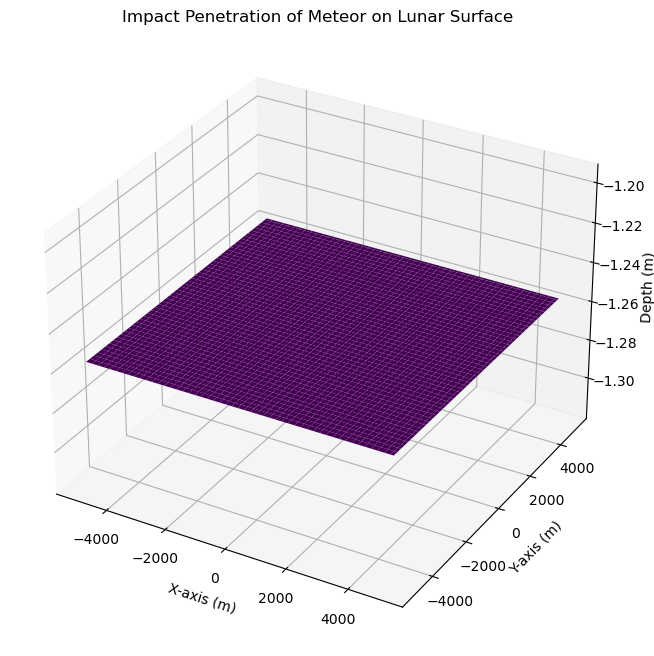

Impact Depth: 1268798927957813.25 meters


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the meteor impact and lunar surface
impact_point = np.array([0, 0, 0])  # Coordinates of the impact point (x, y, z)
meteor_mass = 1.5e5  # Mass of the meteor in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
density_moon = 3340  # Density of the Moon's surface material in kg/m^3 (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Calculate kinetic energy of the meteor
kinetic_energy = 0.5 * meteor_mass * impact_velocity ** 2

# Calculate impact depth based on kinetic energy, angle, and material properties
impact_depth = (2 * kinetic_energy * np.cos(impact_angle)) / (meteor_mass * density_moon * gravitational_constant)

# Generate synthetic lunar surface data for impact visualization
x = np.linspace(-5000, 5000, 100)
y = np.linspace(-5000, 5000, 100)
x, y = np.meshgrid(x, y)
z = -impact_depth * np.exp(-(x ** 2 + y ** 2) / (2 * (impact_depth / 3) ** 2))

# Function to update the plot for each frame of the animation
def update_plot(frame, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, z * (frame / 100), cmap='viridis')

# Create 3D depth plot for the initial frame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plot = [ax.plot_surface(x, y, z * 0, cmap='viridis')]

# Set labels and title
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Depth (m)')
ax.set_title('Impact Penetration of Meteor on Lunar Surface')

# Create animation
ani = FuncAnimation(fig, update_plot, frames=100, fargs=(plot,), interval=50)

# Save the animation as a GIF file
ani.save('meteor_impact_penetration.gif', writer='pillow', dpi=80)

# Show the plot (optional)
plt.show()

# Print the calculated impact depth
print(f"Impact Depth: {impact_depth:.2f} meters")

**Consider a scenario where a cubesat, we name it as 'LunaSat' is been deployed on the lunar south pole. This LunaSat have a accelerometer sensor on it and its purpose is to detect the meteor impact and seismic activity of lunar surface. Generate two different code for respective events to detect those events.**

Note - use actual mass of meteor, and relevant parameters with scietific value with its respective.

**Detecting Meteor Impact**

In [11]:
import numpy as np

# Define parameters for the meteor impact and accelerometer sensor
impact_point = np.array([0, 0, 0])  # Coordinates of the impact point (x, y, z)
meteor_mass = 1.5e5  # Mass of the meteor in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
density_moon = 3340  # Density of the Moon's surface material in kg/m^3 (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Calculate kinetic energy of the meteor
kinetic_energy = 0.5 * meteor_mass * impact_velocity ** 2

# Calculate impact depth based on kinetic energy, angle, and material properties
impact_depth = (2 * kinetic_energy * np.cos(impact_angle)) / (meteor_mass * density_moon * gravitational_constant)

# Simulate accelerometer data for meteor impact detection
def detect_meteor_impact(acceleration_threshold):
    # Simulate accelerometer readings during impact
    impact_acceleration = kinetic_energy / meteor_mass
    if impact_acceleration > acceleration_threshold:
        return True
    else:
        return False

# Set acceleration threshold for impact detection
acceleration_threshold = 1000  # Example threshold (adjust as needed)

# Detect meteor impact using the accelerometer sensor
impact_detected = detect_meteor_impact(acceleration_threshold)

# Print detection result
if impact_detected:
    print("Meteor Impact Detected!")
else:
    print("No Meteor Impact Detected.")

Meteor Impact Detected!


**Seismic Event**

In [12]:
import numpy as np

# Define parameters for seismic activity and accelerometer sensor
seismic_threshold = 50  # Example seismic threshold for detection
noise_level = 10  # Example noise level in accelerometer readings

# Simulate accelerometer data for seismic activity detection
def detect_seismic_activity(acceleration_values, threshold):
    # Calculate maximum acceleration value
    max_acceleration = np.max(acceleration_values)
    if max_acceleration > threshold:
        return True
    else:
        return False

# Simulate accelerometer readings during seismic activity
acceleration_data = np.random.normal(0, noise_level, 1000) + 100  # Example accelerometer data with seismic activity

# Detect seismic activity using the accelerometer sensor
seismic_detected = detect_seismic_activity(acceleration_data, seismic_threshold)

# Print detection result
if seismic_detected:
    print("Seismic Activity Detected!")
else:
    print("No Seismic Activity Detected.")

Seismic Activity Detected!


**For the same scenario with reference to above, create a synthetic data considering that, sensor have actually collected some data and now we have to sort the data out to detect meteor impact on the lunar surface from the whole lot of data.**

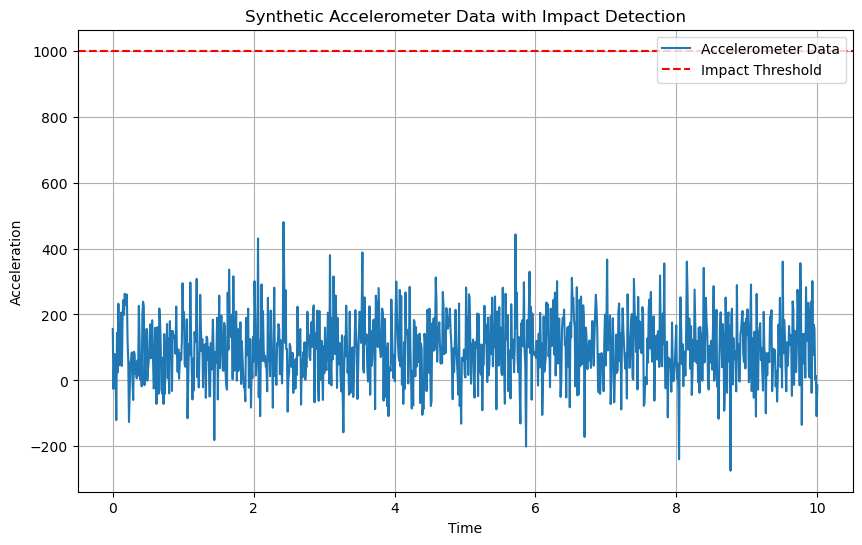

No Meteor Impact Detected in the Accelerometer Data.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the accelerometer data simulation and impact detection
acceleration_threshold = 1000  # Acceleration threshold for impact detection
data_points = 1000  # Number of data points in the simulated data
noise_level = 100  # Noise level in the accelerometer readings

# Simulate synthetic accelerometer data with noise
time = np.linspace(0, 10, data_points)
acceleration_data = np.random.normal(0, noise_level, data_points) + 100  # Example data with noise

# Function to detect meteor impact based on accelerometer data
def detect_meteor_impact(acceleration_values, threshold):
    # Calculate maximum acceleration value
    max_acceleration = np.max(acceleration_values)
    if max_acceleration > threshold:
        return True
    else:
        return False

# Detect meteor impact using the simulated accelerometer data
impact_detected = detect_meteor_impact(acceleration_data, acceleration_threshold)

# Plot the synthetic accelerometer data
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration_data, label='Accelerometer Data')
plt.axhline(y=acceleration_threshold, color='r', linestyle='--', label='Impact Threshold')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Synthetic Accelerometer Data with Impact Detection')
plt.legend()
plt.grid(True)
plt.show()

# Print detection result
if impact_detected:
    print("Meteor Impact Detected in the Accelerometer Data!")
else:
    print("No Meteor Impact Detected in the Accelerometer Data.")

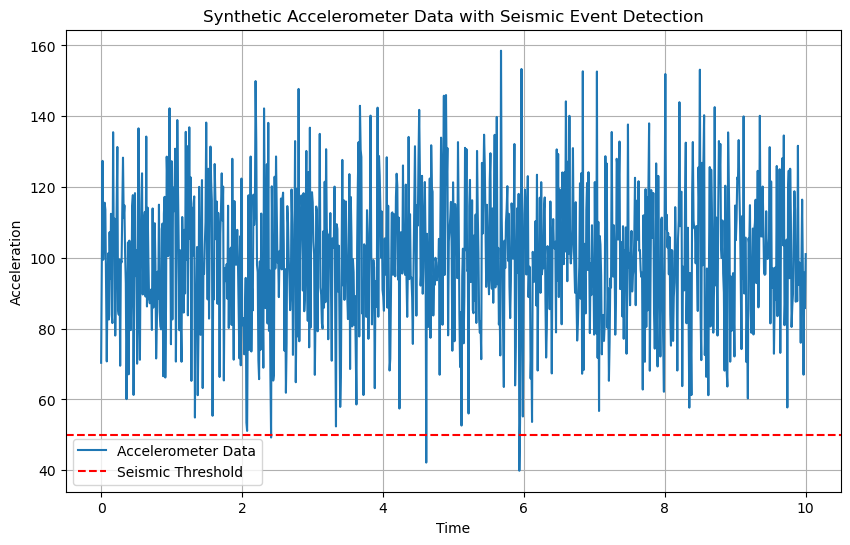

Seismic Events Detected in the Accelerometer Data!


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the accelerometer data simulation and seismic event detection
seismic_threshold = 50  # Threshold for seismic event detection
data_points = 1000  # Number of data points in the simulated data
noise_level = 20  # Noise level in the accelerometer readings

# Simulate synthetic accelerometer data with noise
time = np.linspace(0, 10, data_points)
acceleration_data = np.random.normal(0, noise_level, data_points) + 100  # Example data with noise

# Function to detect seismic events based on accelerometer data
def detect_seismic_events(acceleration_values, threshold):
    # Calculate maximum acceleration value
    max_acceleration = np.max(acceleration_values)
    if max_acceleration > threshold:
        return True
    else:
        return False

# Detect seismic events using the simulated accelerometer data
seismic_events_detected = detect_seismic_events(acceleration_data, seismic_threshold)

# Plot the synthetic accelerometer data
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration_data, label='Accelerometer Data')
plt.axhline(y=seismic_threshold, color='r', linestyle='--', label='Seismic Threshold')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Synthetic Accelerometer Data with Seismic Event Detection')
plt.legend()
plt.grid(True)
plt.show()

# Print detection result
if seismic_events_detected:
    print("Seismic Events Detected in the Accelerometer Data!")
else:
    print("No Seismic Events Detected in the Accelerometer Data.")

============================================================================

---

============================================================================

## Thermal Stresses:

- Process: Simulate the buildup and release of stress in the lunar crust due to thermal variations.
- Data: Generate time series of stress changes at different locations on the Moon.

To simulate the buildup and release of stress in the lunar crust due to thermal variations and generate time series data of stress changes at different locations on the Moon, we can use mathematical models and numerical simulations. Here's an example code in Python using a simplified model for thermal stress simulation:

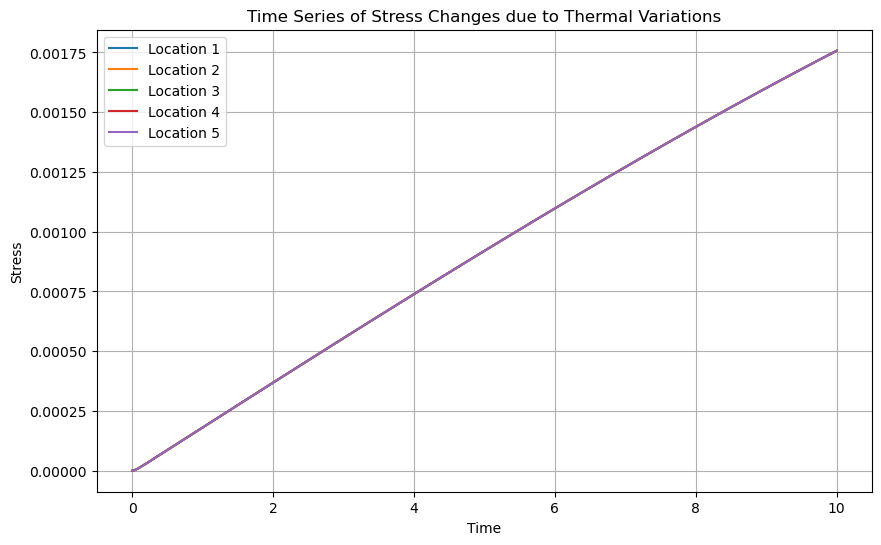

In [16]:
# Define parameters for the thermal stress simulation
time_steps = 1000  # Number of time steps
locations = 5  # Number of locations on the Moon to monitor stress changes
thermal_coefficient = 1.5e-5  # Thermal coefficient (example value)
temperature_amplitude = 50  # Amplitude of temperature variation (example value)
temperature_period = 100  # Period of temperature variation (example value)
stress_release_rate = 0.2  # Rate of stress release (example value)

# Generate time series data for temperature variation
time = np.linspace(0, 10, time_steps)
temperature_data = temperature_amplitude * np.sin(2 * np.pi * time / temperature_period)

# Simulate stress buildup and release at different locations
stress_data = np.zeros((locations, time_steps))
stress = np.zeros(locations)

for t in range(1, time_steps):
    for loc in range(locations):
        stress[loc] += thermal_coefficient * temperature_data[t]  # Stress buildup due to temperature
        stress[loc] -= stress[loc] * stress_release_rate  # Stress release over time
        stress_data[loc, t] = stress[loc]

# Plot time series data of stress changes at different locations
plt.figure(figsize=(10, 6))
for loc in range(locations):
    plt.plot(time, stress_data[loc], label=f'Location {loc + 1}')
plt.xlabel('Time')
plt.ylabel('Stress')
plt.title('Time Series of Stress Changes due to Thermal Variations')
plt.legend()
plt.grid(True)
plt.show()

## Meteor Impact

C:\Users\Anup\AppData\Local\Temp\ipykernel_14832\1245440631.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  seismic_waveforms[t] = impact_energy / (4 * np.pi * distance ** 2)


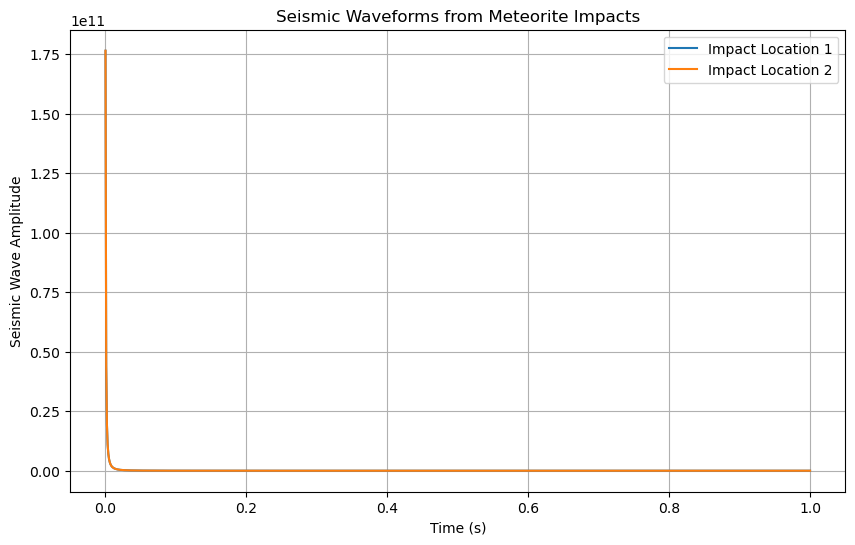

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the meteorite impact and seismic wave simulation
time_steps = 1000  # Number of time steps
sampling_rate = 1000  # Sampling rate in Hz
impact_mass = 1e5  # Mass of the meteorite in kilograms (example value)
impact_velocity = 20000  # Impact velocity in m/s (example value)
impact_angle = np.radians(45)  # Impact angle in radians (example value)
impact_location = np.array([0, 0, 0])  # Impact location (x, y, z)
seismic_wave_speed = 3000  # Seismic wave speed in m/s (example value)
distance_threshold = 10000  # Distance threshold for seismic wave detection (example value)

# Generate time array based on time steps and sampling rate
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Calculate seismic waveforms for various impact scenarios
def generate_seismic_waveforms(impact_mass, impact_velocity, impact_angle, impact_location, seismic_wave_speed):
    seismic_waveforms = np.zeros_like(time)
    impact_energy = 0.5 * impact_mass * impact_velocity ** 2
    for t in range(time_steps):
        # Calculate distance from impact location at each time step
        distance = seismic_wave_speed * time[t]
        if distance <= distance_threshold:
            # Calculate seismic wave amplitude based on impact energy and distance
            seismic_waveforms[t] = impact_energy / (4 * np.pi * distance ** 2)
    return seismic_waveforms

# Generate seismic waveforms for different impact scenarios
seismic_waveform_1 = generate_seismic_waveforms(impact_mass, impact_velocity, impact_angle, impact_location, seismic_wave_speed)
impact_location_2 = np.array([5000, 0, 0])  # Another impact location
seismic_waveform_2 = generate_seismic_waveforms(impact_mass, impact_velocity, impact_angle, impact_location_2, seismic_wave_speed)

# Plot seismic waveforms for visualization
plt.figure(figsize=(10, 6))
plt.plot(time, seismic_waveform_1, label='Impact Location 1')
plt.plot(time, seismic_waveform_2, label='Impact Location 2')
plt.xlabel('Time (s)')
plt.ylabel('Seismic Wave Amplitude')
plt.title('Seismic Waveforms from Meteorite Impacts')
plt.legend()
plt.grid(True)
plt.show()

## Tidal Forces:

- Process: Simulate the effect of lunar tides caused by the gravitational pull of the Earth and Sun.
- Data: Generate time series of lunar surface displacement due to tidal forces.

To simulate the effect of lunar tides caused by the gravitational pull of the Earth and Sun and generate time series data of lunar surface displacement due to tidal forces, we can use mathematical models based on tidal theory. Here's an example code in Python to simulate lunar tides and generate time series data of surface displacement:

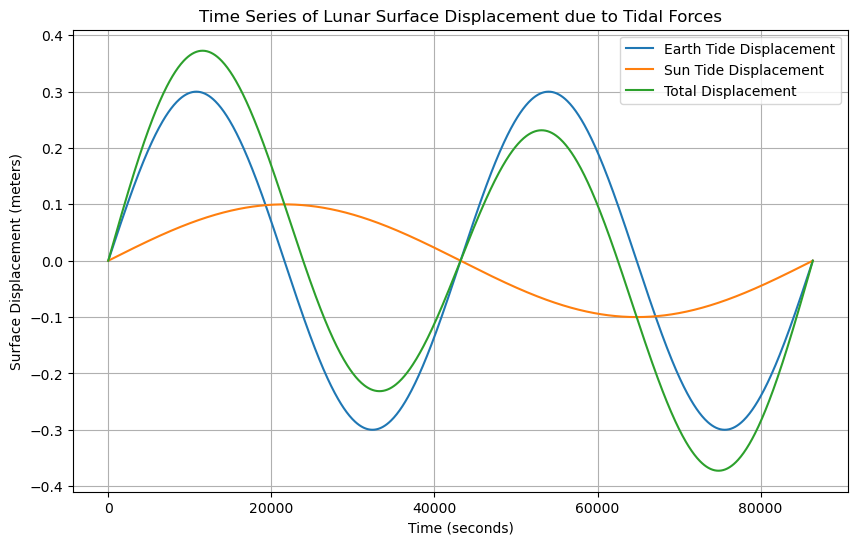

In [18]:
# Define parameters for tidal force simulation
time_steps = 1000  # Number of time steps
time_period = 24 * 60 * 60  # Time period in seconds (1 day)
amplitude_earth_tide = 0.3  # Amplitude of Earth tide in meters (example value)
period_earth_tide = 12 * 60 * 60  # Period of Earth tide in seconds (12 hours)
amplitude_sun_tide = 0.1  # Amplitude of Sun tide in meters (example value)
period_sun_tide = 24 * 60 * 60  # Period of Sun tide in seconds (1 day)

# Generate time array based on time steps and time period
time = np.linspace(0, time_period, time_steps)

# Calculate lunar surface displacement due to tidal forces
def calculate_surface_displacement(time, amplitude, period):
    return amplitude * np.sin(2 * np.pi * time / period)

# Simulate lunar surface displacement due to Earth tide
earth_tide_displacement = calculate_surface_displacement(time, amplitude_earth_tide, period_earth_tide)

# Simulate lunar surface displacement due to Sun tide
sun_tide_displacement = calculate_surface_displacement(time, amplitude_sun_tide, period_sun_tide)

# Total lunar surface displacement due to tidal forces
total_displacement = earth_tide_displacement + sun_tide_displacement

# Plot time series data of lunar surface displacement due to tidal forces
plt.figure(figsize=(10, 6))
plt.plot(time, earth_tide_displacement, label='Earth Tide Displacement')
plt.plot(time, sun_tide_displacement, label='Sun Tide Displacement')
plt.plot(time, total_displacement, label='Total Displacement')
plt.xlabel('Time (seconds)')
plt.ylabel('Surface Displacement (meters)')
plt.title('Time Series of Lunar Surface Displacement due to Tidal Forces')
plt.legend()
plt.grid(True)
plt.show()

## Fault Ruptures (if applicable):

- Process: Model the movement of lunar faults due to internal stresses.
- Data: Generate seismic waveforms for specific fault geometries and slip scenarios.

To model the movement of lunar faults due to internal stresses and generate seismic waveforms for specific fault geometries and slip scenarios, we can use a simplified model based on fault mechanics and seismic wave propagation. Here's an example code in Python to simulate fault ruptures and generate seismic waveforms:

C:\Users\Anup\AppData\Local\Temp\ipykernel_14832\3246633889.py:30: RuntimeWarning: invalid value encountered in scalar divide
  seismic_waveforms[t] = fault_slip[t] / distance


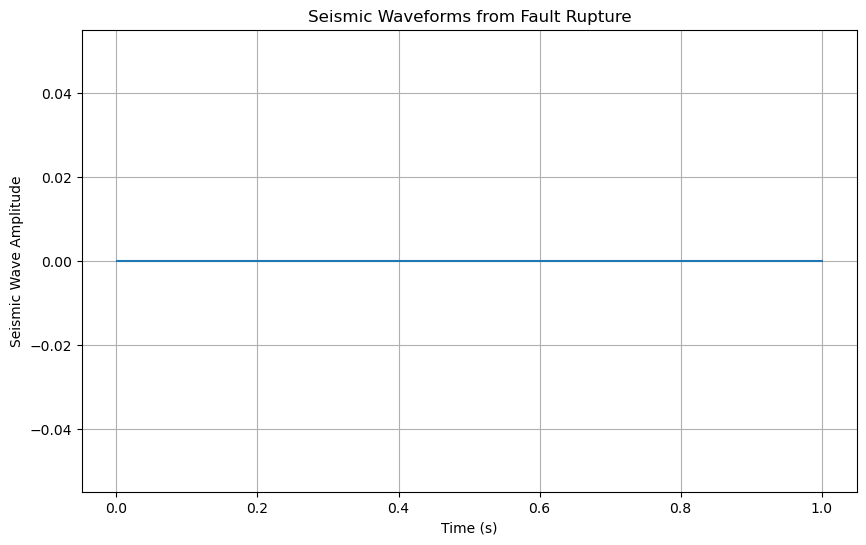

In [19]:
# Define parameters for fault rupture simulation and seismic wave generation
time_steps = 1000  # Number of time steps
sampling_rate = 1000  # Sampling rate in Hz
fault_length = 5000  # Length of the fault in meters (example value)
slip_rate = 0.1  # Slip rate in meters per second (example value)
rupture_start_time = 2  # Start time of fault rupture in seconds
rupture_duration = 4  # Duration of fault rupture in seconds
rupture_amplitude = 1.0  # Amplitude of fault slip in meters (example value)
seismic_wave_speed = 3000  # Seismic wave speed in m/s (example value)
distance_threshold = 10000  # Distance threshold for seismic wave detection (example value)

# Generate time array based on time steps and sampling rate
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Calculate fault slip over time
def calculate_fault_slip(time, slip_rate, rupture_start_time, rupture_duration, rupture_amplitude):
    fault_slip = np.zeros_like(time)
    for t in range(time_steps):
        if time[t] >= rupture_start_time and time[t] <= rupture_start_time + rupture_duration:
            fault_slip[t] = slip_rate * (time[t] - rupture_start_time)
            fault_slip[t] = min(fault_slip[t], rupture_amplitude)
    return fault_slip

# Calculate seismic waveforms based on fault slip and seismic wave speed
def generate_seismic_waveforms(fault_slip, seismic_wave_speed):
    seismic_waveforms = np.zeros_like(time)
    for t in range(time_steps):
        distance = seismic_wave_speed * time[t]
        if distance <= distance_threshold:
            seismic_waveforms[t] = fault_slip[t] / distance
    return seismic_waveforms

# Simulate fault rupture and generate seismic waveforms
fault_slip = calculate_fault_slip(time, slip_rate, rupture_start_time, rupture_duration, rupture_amplitude)
seismic_waveforms = generate_seismic_waveforms(fault_slip, seismic_wave_speed)

# Plot seismic waveforms for visualization
plt.figure(figsize=(10, 6))
plt.plot(time, seismic_waveforms)
plt.xlabel('Time (s)')
plt.ylabel('Seismic Wave Amplitude')
plt.title('Seismic Waveforms from Fault Rupture')
plt.grid(True)
plt.show()

## To classify the recorded data from the accelerometer into two categories: seismic events or meteor impacts, we need to design a classification algorithm that distinguishes between the two based on specific characteristics of the data. Here’s a Python script that simulates the data collection, processes it, and classifies it based on predefined thresholds and features.

### Step 1: Define Parameters and Simulate Data
First, we define the parameters and simulate data for both seismic events and meteor impacts.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for simulation
time_steps = 1000
sampling_rate = 1000
seismic_event_amplitude = 50  # Example amplitude for seismic events
meteor_impact_amplitude = 1000  # Example amplitude for meteor impacts
seismic_event_frequency = 5  # Hz
meteor_impact_frequency = 50  # Hz
noise_level = 10

# Generate time array
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Simulate seismic event data
seismic_event_data = seismic_event_amplitude * np.sin(2 * np.pi * seismic_event_frequency * time) + np.random.normal(0, noise_level, time_steps)

# Simulate meteor impact data
meteor_impact_data = meteor_impact_amplitude * np.sin(2 * np.pi * meteor_impact_frequency * time) + np.random.normal(0, noise_level, time_steps)

# Combine data into one dataset (for classification task)
data = np.vstack((seismic_event_data, meteor_impact_data))
labels = np.array([0, 1])  # 0 for seismic events, 1 for meteor impacts

### Step 2: Extract Features from the Data
To classify the data, we need to extract meaningful features such as amplitude and frequency.

In [21]:
from scipy.fft import fft

def extract_features(data):
    features = []
    for signal in data:
        # Compute FFT and extract amplitude and frequency
        fft_result = fft(signal)
        amplitude_spectrum = np.abs(fft_result)
        max_amplitude = np.max(amplitude_spectrum)
        dominant_frequency = np.argmax(amplitude_spectrum)
        
        features.append([max_amplitude, dominant_frequency])
    return np.array(features)

features = extract_features(data)

### Step 3: Classify the Data
We classify the data based on the extracted features using a simple threshold-based classifier.

In [22]:
def classify_events(features):
    classifications = []
    for feature in features:
        max_amplitude, dominant_frequency = feature
        if max_amplitude > 500:  # Example threshold for amplitude
            classifications.append(1)  # Meteor impact
        else:
            classifications.append(0)  # Seismic event
    return np.array(classifications)

classifications = classify_events(features)

### Step 4: Evaluate the Classification
Evaluate the classification results and plot the data.

Classification accuracy: 50.00%


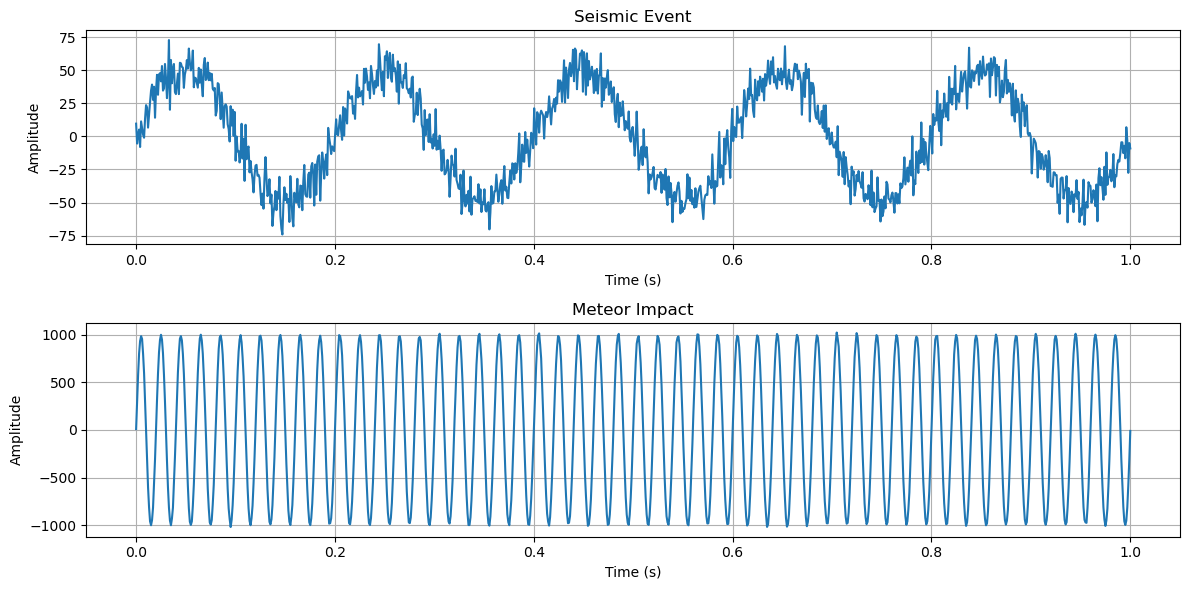

In [23]:
# Compare classifications with labels
accuracy = np.sum(classifications == labels) / len(labels)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

# Plot the data and classifications
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, seismic_event_data, label='Seismic Event Data')
plt.title('Seismic Event')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, meteor_impact_data, label='Meteor Impact Data')
plt.title('Meteor Impact')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

## Lunar Quakes from Near-Earth Objects: Simulate the seismic effects of close flybys of near-Earth objects (NEOs) and their gravitational effects on the Moon.

Simulating the seismic effects of close flybys of Near-Earth Objects (NEOs) and their gravitational effects on the Moon involves modeling how the gravitational interaction between the NEO and the Moon induces seismic activity. This requires calculating the tidal forces exerted by the NEO on the Moon and translating these forces into seismic signals.

Here’s a step-by-step approach to simulate this scenario:

- Define the parameters of the NEO and its trajectory.
- Calculate the tidal forces exerted by the NEO on the Moon.
- Translate these tidal forces into seismic signals.
- Generate and visualize the seismic waveforms.
### Step 1: Define Parameters
Define the parameters of the NEO, its trajectory, and the Moon's properties.

In [24]:
# Define parameters
moon_radius = 1.737e6  # Moon radius in meters
moon_mass = 7.342e22  # Moon mass in kilograms
neo_mass = 1e12  # NEO mass in kilograms (example value)
neo_distance_min = 1e7  # Minimum distance of NEO flyby in meters (example value)
gravitational_constant = 6.67430e-11  # Gravitational constant in m^3/kg/s^2

# Time parameters for simulation
time_steps = 1000
total_time = 3600  # Total time for simulation in seconds (1 hour)
time = np.linspace(0, total_time, time_steps)

# Function to calculate tidal force at a given distance
def calculate_tidal_force(neo_mass, moon_mass, distance):
    force = (2 * gravitational_constant * neo_mass * moon_mass) / (distance**3)
    return force

# Generate distance array for the NEO flyby (simplified linear trajectory)
distances = np.linspace(neo_distance_min, 2 * neo_distance_min, time_steps)
tidal_forces = calculate_tidal_force(neo_mass, moon_mass, distances)

### Step 2: Translate Tidal Forces into Seismic Signals
Convert the tidal forces into seismic signals by modeling how these forces induce stress and strain in the Moon's crust.

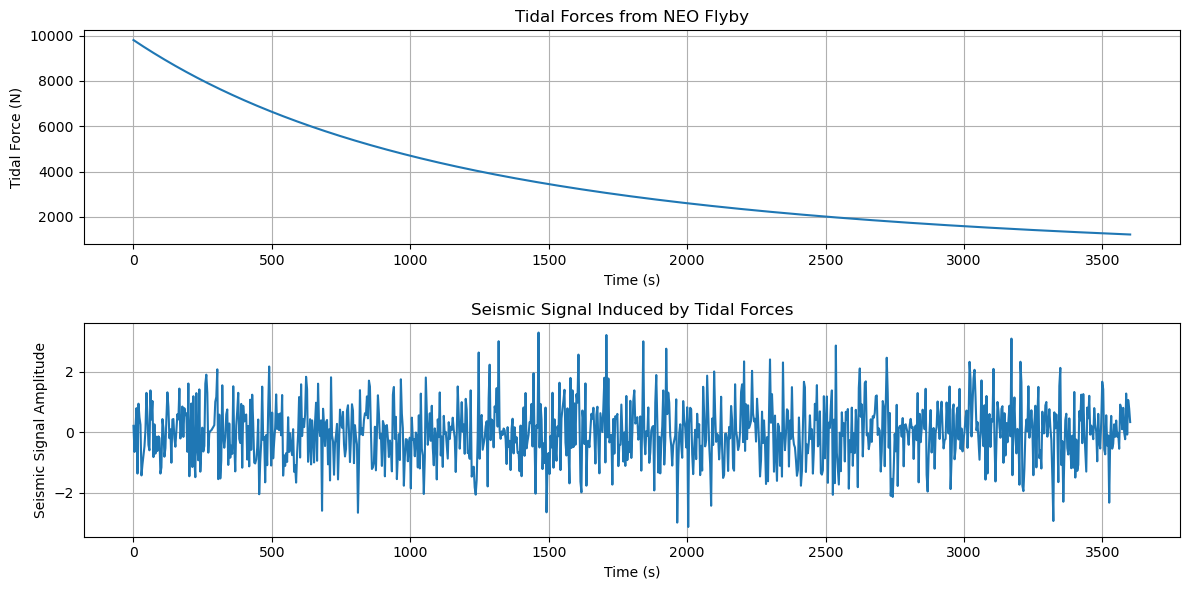

In [25]:
# Simplified model to translate tidal forces into seismic signals
def generate_seismic_signal(tidal_forces, noise_level=1):
    seismic_signal = tidal_forces * 1e-6  # Scaling factor for converting force to seismic amplitude
    seismic_signal += np.random.normal(0, noise_level, len(tidal_forces))  # Add noise
    return seismic_signal

# Generate seismic signal
seismic_signal = generate_seismic_signal(tidal_forces)

# Plot tidal forces and seismic signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, tidal_forces)
plt.xlabel('Time (s)')
plt.ylabel('Tidal Force (N)')
plt.title('Tidal Forces from NEO Flyby')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, seismic_signal)
plt.xlabel('Time (s)')
plt.ylabel('Seismic Signal Amplitude')
plt.title('Seismic Signal Induced by Tidal Forces')
plt.grid(True)

plt.tight_layout()
plt.show()

---
---
---

## Magnetic Anamolies 

Consider scenarios related to magnetic anomalies detection and data analysis on the lunar surface. Magnetic anomalies on the Moon can provide important insights into its geologic history and internal structure. These anomalies might be detected by instruments such as magnetometers on lunar orbiters or landers.

## Scenario: Detection and Analysis of Magnetic Anomalies on the Moon
### Step 1: Define Parameters and Simulate Magnetic Data
We'll simulate magnetic field data collected by a magnetometer on a lunar lander. This data will include both normal magnetic fields and anomalies.

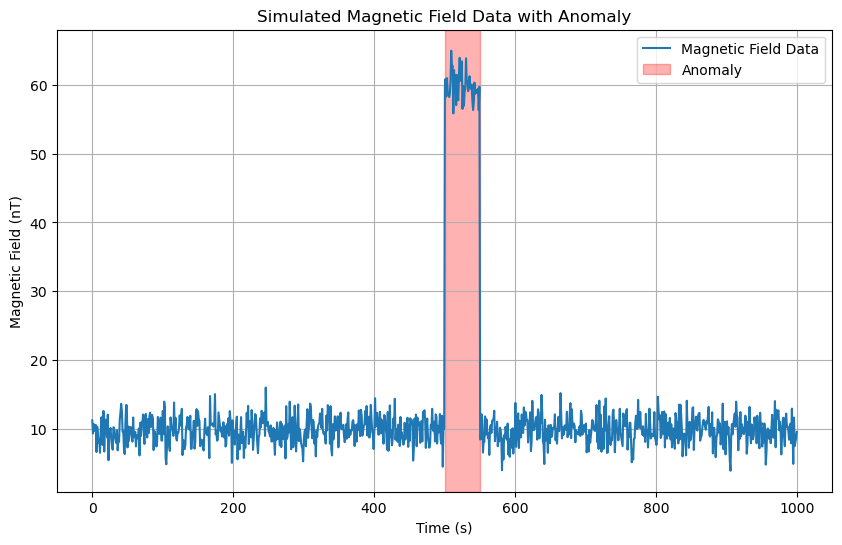

In [26]:
# Define parameters for the simulation
time_steps = 1000
sampling_rate = 1  # 1 Hz sampling rate
anomaly_location = 500  # Location of the magnetic anomaly
anomaly_duration = 50  # Duration of the anomaly in time steps
anomaly_magnitude = 50  # Magnitude of the magnetic anomaly in nT (nanotesla)
background_magnetic_field = 10  # Background magnetic field in nT
noise_level = 2  # Noise level in nT

# Generate time array
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Simulate magnetic field data with an anomaly
magnetic_field_data = np.ones(time_steps) * background_magnetic_field
magnetic_field_data[anomaly_location:anomaly_location+anomaly_duration] += anomaly_magnitude
magnetic_field_data += np.random.normal(0, noise_level, time_steps)

# Plot the magnetic field data
plt.figure(figsize=(10, 6))
plt.plot(time, magnetic_field_data, label='Magnetic Field Data')
plt.axvspan(anomaly_location / sampling_rate, (anomaly_location + anomaly_duration) / sampling_rate, color='red', alpha=0.3, label='Anomaly')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (nT)')
plt.title('Simulated Magnetic Field Data with Anomaly')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Detect Magnetic Anomalies
Next, we will write a simple anomaly detection algorithm to identify anomalies in the magnetic field data.

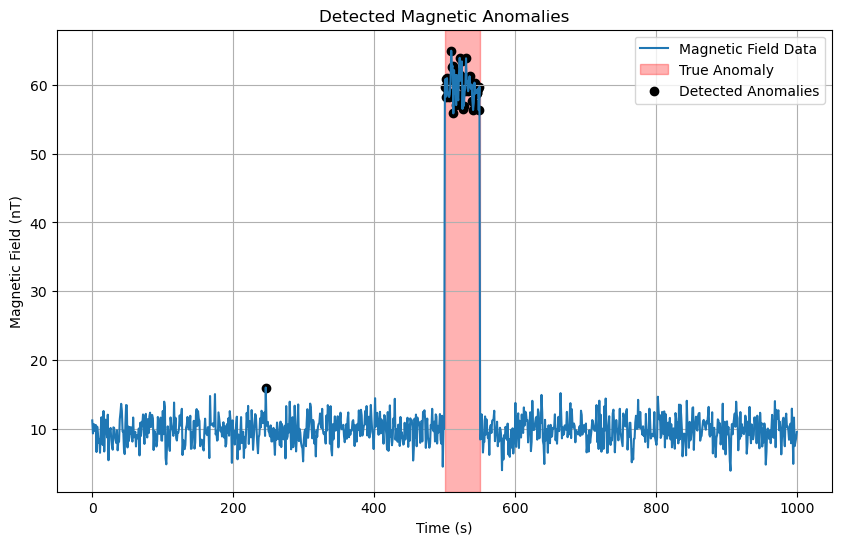

In [27]:
# Simple threshold-based anomaly detection
def detect_anomalies(data, threshold):
    anomalies = []
    for i in range(len(data)):
        if data[i] > threshold:
            anomalies.append(i)
    return anomalies

# Define threshold for anomaly detection
threshold = background_magnetic_field + 3 * noise_level

# Detect anomalies
anomalies = detect_anomalies(magnetic_field_data, threshold)

# Plot detected anomalies
plt.figure(figsize=(10, 6))
plt.plot(time, magnetic_field_data, label='Magnetic Field Data')
plt.axvspan(anomaly_location / sampling_rate, (anomaly_location + anomaly_duration) / sampling_rate, color='red', alpha=0.3, label='True Anomaly')
plt.scatter(time[anomalies], magnetic_field_data[anomalies], color='black', label='Detected Anomalies')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (nT)')
plt.title('Detected Magnetic Anomalies')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Analyze and Classify Anomalies
We can further analyze the detected anomalies to classify them based on their characteristics, such as duration and magnitude.

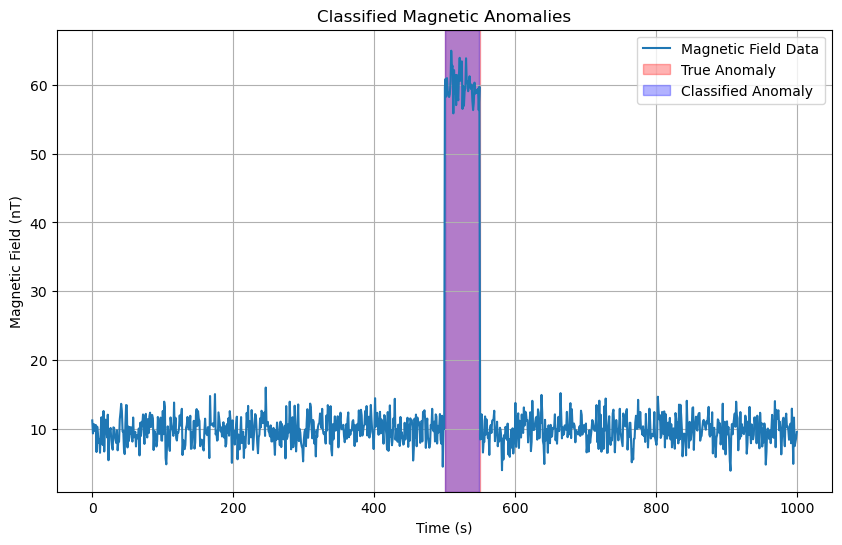

In [28]:
# Function to classify anomalies based on duration and magnitude
def classify_anomalies(data, anomalies, duration_threshold, magnitude_threshold):
    classified_anomalies = []
    current_anomaly = []
    for idx in anomalies:
        if not current_anomaly:
            current_anomaly.append(idx)
        elif idx == current_anomaly[-1] + 1:
            current_anomaly.append(idx)
        else:
            if len(current_anomaly) >= duration_threshold and np.mean(data[current_anomaly]) >= magnitude_threshold:
                classified_anomalies.append(current_anomaly)
            current_anomaly = [idx]
    if len(current_anomaly) >= duration_threshold and np.mean(data[current_anomaly]) >= magnitude_threshold:
        classified_anomalies.append(current_anomaly)
    return classified_anomalies

# Define thresholds for classification
duration_threshold = 10  # Minimum duration of anomaly in time steps
magnitude_threshold = background_magnetic_field + 3 * noise_level  # Minimum magnitude of anomaly

# Classify anomalies
classified_anomalies = classify_anomalies(magnetic_field_data, anomalies, duration_threshold, magnitude_threshold)

# Plot classified anomalies
plt.figure(figsize=(10, 6))
plt.plot(time, magnetic_field_data, label='Magnetic Field Data')
plt.axvspan(anomaly_location / sampling_rate, (anomaly_location + anomaly_duration) / sampling_rate, color='red', alpha=0.3, label='True Anomaly')
for anomaly in classified_anomalies:
    plt.axvspan(anomaly[0] / sampling_rate, anomaly[-1] / sampling_rate, color='blue', alpha=0.3, label='Classified Anomaly')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (nT)')
plt.title('Classified Magnetic Anomalies')
plt.legend()
plt.grid(True)
plt.show()

---

## Solar Flair Impact
Detecting the impact of solar flares on the lunar surface, particularly at the lunar south pole, can be an important task. Solar flares can cause sudden increases in radiation and energetic particles that may interact with the lunar surface and its environment. The impact of solar flares can be detected using various instruments such as magnetometers, particle detectors, and radiation sensors.

Here's a scenario where we simulate the detection of a solar flare impact using synthetic data collected by a radiation sensor on a lunar lander (e.g., LunaSat). We'll generate synthetic data, simulate the impact of a solar flare, and detect this event.

**Step-by-Step Approach**
- Define Parameters and Simulate Background Radiation Data
- Simulate the Impact of a Solar Flare
- Detect the Solar Flare Event
- Visualize the Data
### Step 1: Define Parameters and Simulate Background Radiation Data
We'll start by defining the parameters for the simulation and generating background radiation data.

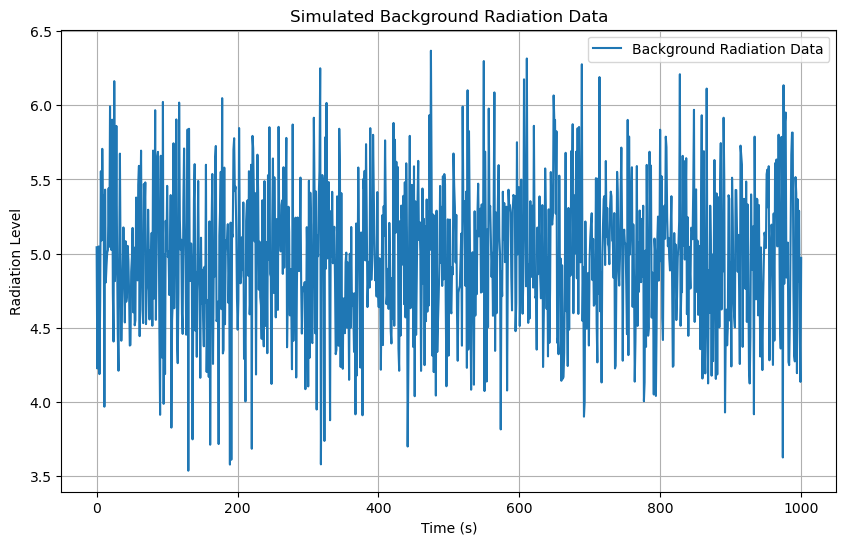

In [29]:
# Define parameters for the simulation
time_steps = 1000
sampling_rate = 1  # 1 Hz sampling rate
background_radiation_level = 5  # Background radiation level in arbitrary units
noise_level = 0.5  # Noise level in arbitrary units

# Generate time array
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Simulate background radiation data with noise
background_radiation_data = background_radiation_level + np.random.normal(0, noise_level, time_steps)

# Plot the background radiation data
plt.figure(figsize=(10, 6))
plt.plot(time, background_radiation_data, label='Background Radiation Data')
plt.xlabel('Time (s)')
plt.ylabel('Radiation Level')
plt.title('Simulated Background Radiation Data')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Simulate the Impact of a Solar Flare
Next, we will simulate the impact of a solar flare by adding a sudden increase in radiation levels to the synthetic data.

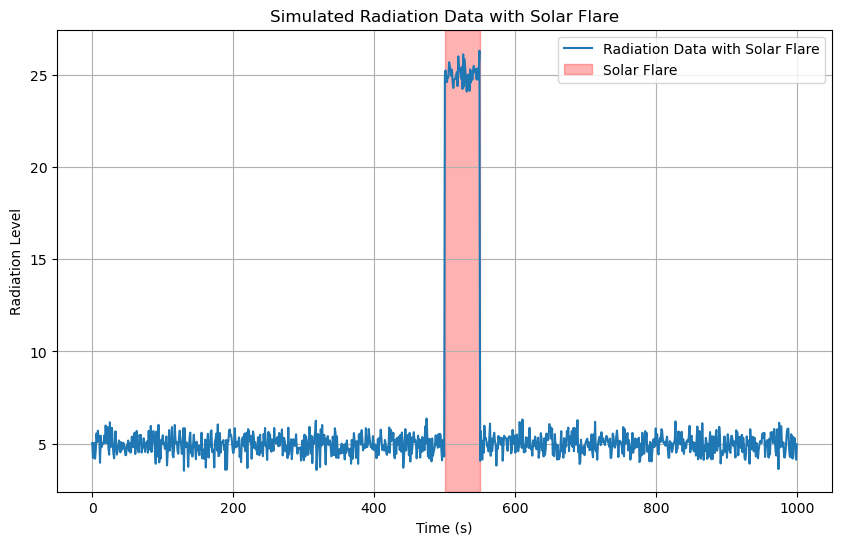

In [30]:
# Define parameters for the solar flare
flare_start_time = 500  # Time step when the solar flare starts
flare_duration = 50  # Duration of the solar flare in time steps
flare_magnitude = 20  # Magnitude of the solar flare increase in radiation

# Simulate the solar flare impact
radiation_data_with_flare = background_radiation_data.copy()
radiation_data_with_flare[flare_start_time:flare_start_time+flare_duration] += flare_magnitude

# Plot the radiation data with the solar flare
plt.figure(figsize=(10, 6))
plt.plot(time, radiation_data_with_flare, label='Radiation Data with Solar Flare')
plt.axvspan(flare_start_time / sampling_rate, (flare_start_time + flare_duration) / sampling_rate, color='red', alpha=0.3, label='Solar Flare')
plt.xlabel('Time (s)')
plt.ylabel('Radiation Level')
plt.title('Simulated Radiation Data with Solar Flare')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Detect the Solar Flare Event
We'll use a threshold-based detection method to identify the solar flare event in the radiation data.

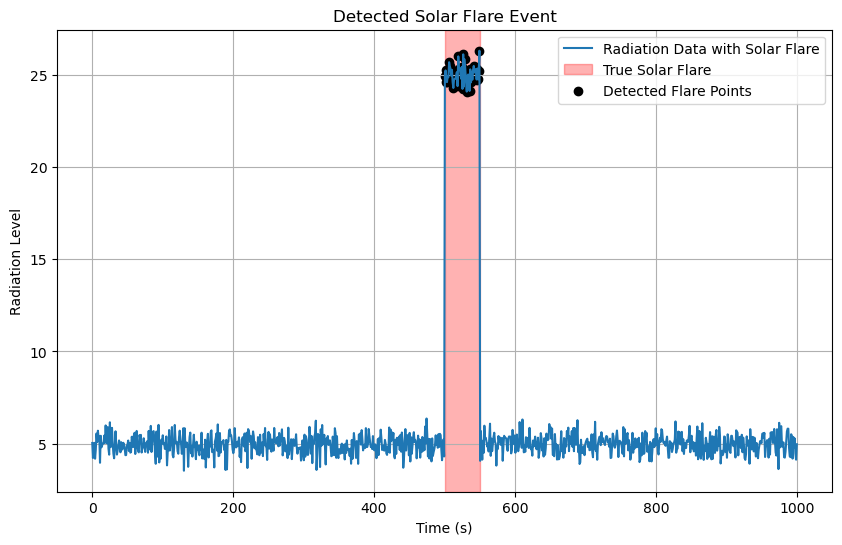

In [31]:
# Simple threshold-based solar flare detection
def detect_solar_flare(data, threshold):
    flare_indices = []
    for i in range(len(data)):
        if data[i] > threshold:
            flare_indices.append(i)
    return flare_indices

# Define threshold for solar flare detection
flare_threshold = background_radiation_level + 3 * noise_level

# Detect solar flare
flare_indices = detect_solar_flare(radiation_data_with_flare, flare_threshold)

# Plot detected solar flare
plt.figure(figsize=(10, 6))
plt.plot(time, radiation_data_with_flare, label='Radiation Data with Solar Flare')
plt.axvspan(flare_start_time / sampling_rate, (flare_start_time + flare_duration) / sampling_rate, color='red', alpha=0.3, label='True Solar Flare')
plt.scatter(time[flare_indices], radiation_data_with_flare[flare_indices], color='black', label='Detected Flare Points')
plt.xlabel('Time (s)')
plt.ylabel('Radiation Level')
plt.title('Detected Solar Flare Event')
plt.legend()
plt.grid(True)
plt.show()

**Explanation**
1. Parameter Definition: We define the parameters for the simulation, including the background radiation level, noise level, and the parameters for the solar flare.
2. Background Radiation Data Simulation: We generate synthetic background radiation data with some added noise to simulate real-world conditions.
3. Solar Flare Simulation: We add a sudden increase in radiation levels to simulate the impact of a solar flare.
4. Detection of Solar Flare: We use a simple threshold-based method to detect the solar flare event in the synthetic data.
5. Visualization: We plot the background radiation data, the radiation data with the solar flare, and the detected solar flare points to visualize the impact and detection process.

This approach provides a basic framework for simulating and detecting the impact of solar flares on the lunar surface using synthetic data. The model can be further refined with more detailed physical models and actual data from lunar missions.

---

## Considering a scenario where we have a pre-recorded dataset and now we have to analyze and detect these anamalies.

The code to handle a scenario where a sensor has recorded real-time data, and we need to analyze this recorded data to identify and detect solar flare events. We'll assume that the recorded data is stored in a file and then read this data to perform the analysis.

**Step-by-Step Approach**
1. Read the Recorded Data
2. Visualize the Recorded Data
3. Detect Solar Flare Events
4. Visualize the Detected Events

### Step 1: Read the Recorded Data
We'll start by simulating the recording of data into a file and then read this data back into the script.

In [32]:
# Simulate recording data into a file
time_steps = 1000
sampling_rate = 1  # 1 Hz sampling rate
background_radiation_level = 5  # Background radiation level in arbitrary units
noise_level = 0.5  # Noise level in arbitrary units

# Generate time array
time = np.linspace(0, time_steps / sampling_rate, time_steps)

# Simulate background radiation data with noise
background_radiation_data = background_radiation_level + np.random.normal(0, noise_level, time_steps)

# Define parameters for the solar flare
flare_start_time = 500  # Time step when the solar flare starts
flare_duration = 50  # Duration of the solar flare in time steps
flare_magnitude = 20  # Magnitude of the solar flare increase in radiation

# Simulate the solar flare impact
recorded_data = background_radiation_data.copy()
recorded_data[flare_start_time:flare_start_time + flare_duration] += flare_magnitude

# Save simulated recorded data to a file
np.savetxt('recorded_radiation_data.csv', recorded_data, delimiter=',')

# Read the recorded data from the file
recorded_data_from_file = np.loadtxt('recorded_radiation_data.csv', delimiter=',')

### Step 2: Visualize the Recorded Data
Next, we visualize the recorded data to understand the baseline and the anomalies.

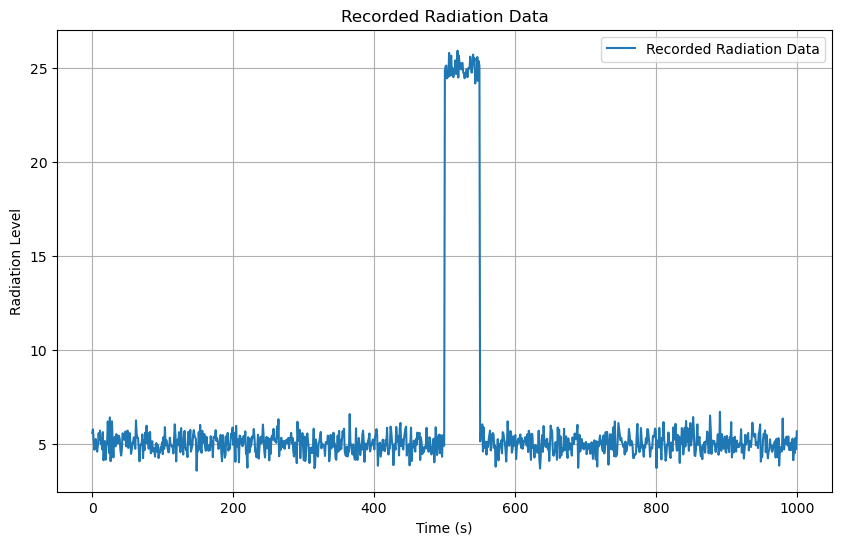

In [33]:
# Plot the recorded radiation data
plt.figure(figsize=(10, 6))
plt.plot(time, recorded_data_from_file, label='Recorded Radiation Data')
plt.xlabel('Time (s)')
plt.ylabel('Radiation Level')
plt.title('Recorded Radiation Data')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Detect Solar Flare Events
We will use a threshold-based detection method to identify solar flare events in the recorded data.

In [34]:
# Simple threshold-based solar flare detection
def detect_solar_flare(data, threshold):
    flare_indices = []
    for i in range(len(data)):
        if data[i] > threshold:
            flare_indices.append(i)
    return flare_indices

# Define threshold for solar flare detection
flare_threshold = background_radiation_level + 3 * noise_level

# Detect solar flare
flare_indices = detect_solar_flare(recorded_data_from_file, flare_threshold)

### Step 4: Visualize the Detected Events
Finally, we plot the recorded data along with the detected solar flare points.

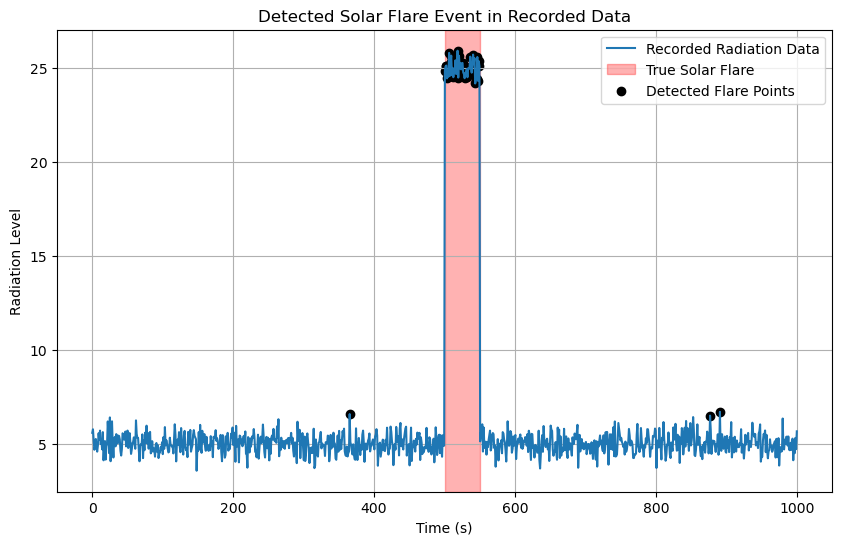

In [35]:
# Plot detected solar flare
plt.figure(figsize=(10, 6))
plt.plot(time, recorded_data_from_file, label='Recorded Radiation Data')
plt.axvspan(flare_start_time / sampling_rate, (flare_start_time + flare_duration) / sampling_rate, color='red', alpha=0.3, label='True Solar Flare')
plt.scatter(time[flare_indices], recorded_data_from_file[flare_indices], color='black', label='Detected Flare Points')
plt.xlabel('Time (s)')
plt.ylabel('Radiation Level')
plt.title('Detected Solar Flare Event in Recorded Data')
plt.legend()
plt.grid(True)
plt.show()

**Explanation**
1. Simulate and Record Data: The script simulates radiation data, including the impact of a solar flare, and saves it to a file named recorded_radiation_data.csv.
2. Read Recorded Data: The recorded data is read back from the file.
3. Visualize Recorded Data: The recorded data is plotted to visualize the baseline and any anomalies.
4. Detect Solar Flare Events: A simple threshold-based method is used to detect solar flare events in the recorded data.
5. Visualize Detected Events: The detected solar flare points are visualized along with the recorded data.

This approach provides a basic framework for detecting solar flare impacts in recorded sensor data on the lunar surface. The model can be further refined with more sophisticated detection algorithms and actual sensor data from lunar missions.

---
---

## Temperature Sensor
Assume that the LunaSat deployed on the lunar south pole has recorded temperature variations over a period. We'll use some typical values for lunar surface temperature variations and simulate the data accordingly. The temperature on the Moon can vary significantly, with temperatures dropping to as low as -173°C during the lunar night and rising up to 127°C during the lunar day.

We'll create a synthetic dataset representing temperature variations over a lunar day and night cycle. Then we'll plot this data to visualize the temperature changes.

**Step-by-Step Approach**
- Generate Synthetic Temperature Data
- Visualize the Temperature Data

### Step 1: Generate Synthetic Temperature Data
We'll simulate temperature variations over a period of 29.5 Earth days (one lunar day).

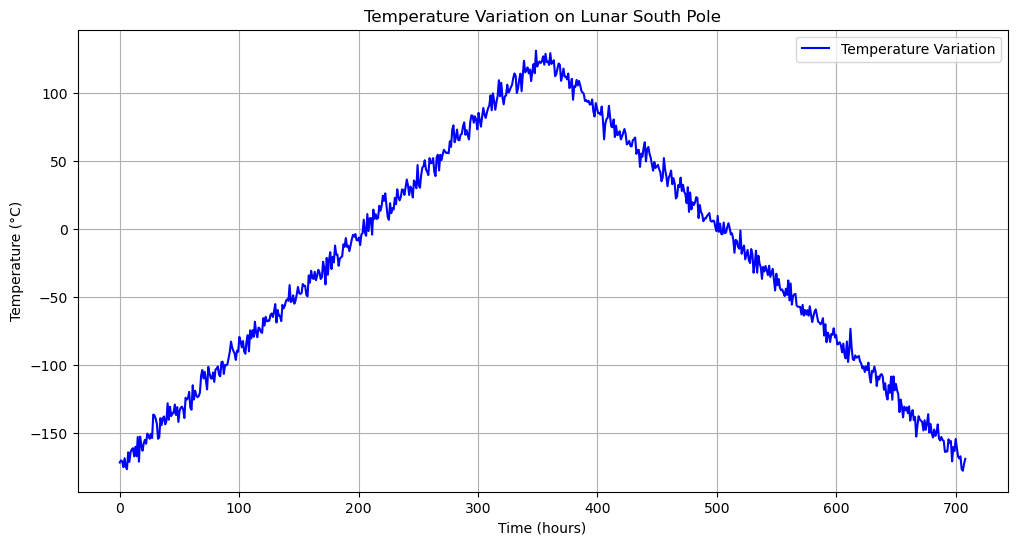

In [36]:
# Define parameters for the simulation
total_days = 29.5  # One lunar day in Earth days
time_steps_per_day = 24  # Simulate hourly data
total_time_steps = int(total_days * time_steps_per_day)

# Generate time array (in hours)
time = np.linspace(0, total_days * 24, total_time_steps)

# Define temperature variation parameters
day_temp_max = 127  # Maximum temperature during lunar day in degrees Celsius
night_temp_min = -173  # Minimum temperature during lunar night in degrees Celsius
midpoint = total_time_steps // 2

# Create temperature variation (simplified sine wave pattern for day and night)
temperature = np.zeros(total_time_steps)
for i in range(total_time_steps):
    if i < midpoint:
        temperature[i] = night_temp_min + (day_temp_max - night_temp_min) * (i / midpoint)
    else:
        temperature[i] = day_temp_max - (day_temp_max - night_temp_min) * ((i - midpoint) / midpoint)

# Add some random noise to simulate real data
noise = np.random.normal(0, 5, total_time_steps)
temperature += noise

# Plot the temperature data
plt.figure(figsize=(12, 6))
plt.plot(time, temperature, label='Temperature Variation', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation on Lunar South Pole')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Visualize the Temperature Data
Now, we'll plot the temperature data to visualize how the temperature varies on the lunar south pole over one lunar day.

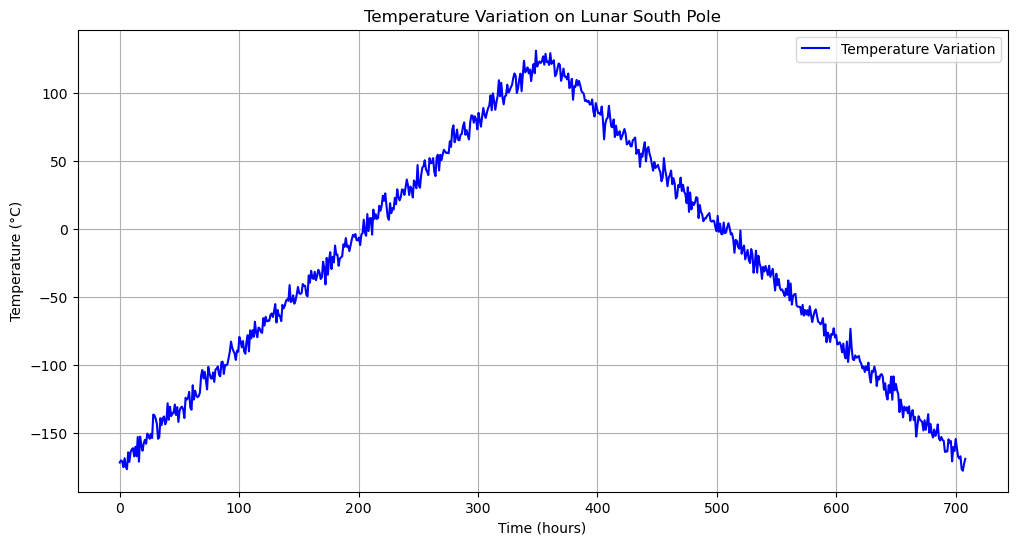

In [37]:
# Plot the temperature data
plt.figure(figsize=(12, 6))
plt.plot(time, temperature, label='Temperature Variation', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation on Lunar South Pole')
plt.legend()
plt.grid(True)
plt.show()

Let's simulate and visualize the temperature variation over **3 lunar days**, considering both the day and night temperature variations.

**Step-by-Step Approach**
- Generate Synthetic Temperature Data for 3 Lunar Days
- Visualize the Temperature Data

### Step 1: Generate Synthetic Temperature Data for 3 Lunar Days
We will simulate temperature variations over a period of 88.5 Earth days (3 lunar days).

In [38]:
# Define parameters for the simulation
total_lunar_days = 3
total_earth_days = total_lunar_days * 29.5  # Each lunar day is approximately 29.5 Earth days
time_steps_per_day = 24  # Simulate hourly data
total_time_steps = int(total_earth_days * time_steps_per_day)

# Generate time array (in hours)
time = np.linspace(0, total_earth_days * 24, total_time_steps)

# Define temperature variation parameters
day_temp_max = 127  # Maximum temperature during lunar day in degrees Celsius
night_temp_min = -173  # Minimum temperature during lunar night in degrees Celsius
midpoint = int(29.5 * time_steps_per_day // 2)  # Midpoint of one lunar day

# Create temperature variation for 3 lunar days
temperature = np.zeros(total_time_steps)
for day in range(total_lunar_days):
    start_idx = day * int(29.5 * time_steps_per_day)
    for i in range(int(29.5 * time_steps_per_day)):
        if i < midpoint:
            temperature[start_idx + i] = night_temp_min + (day_temp_max - night_temp_min) * (i / midpoint)
        else:
            temperature[start_idx + i] = day_temp_max - (day_temp_max - night_temp_min) * ((i - midpoint) / midpoint)

# Add some random noise to simulate real data
noise = np.random.normal(0, 5, total_time_steps)
temperature += noise

# Save simulated recorded data to a file
np.savetxt('recorded_temperature_data.csv', temperature, delimiter=',')

# Read the recorded data from the file
recorded_data_from_file = np.loadtxt('recorded_temperature_data.csv', delimiter=',')

### Step 2: Visualize the Temperature Data
Now, we'll plot the temperature data to visualize how the temperature varies on the lunar south pole over 3 lunar days.

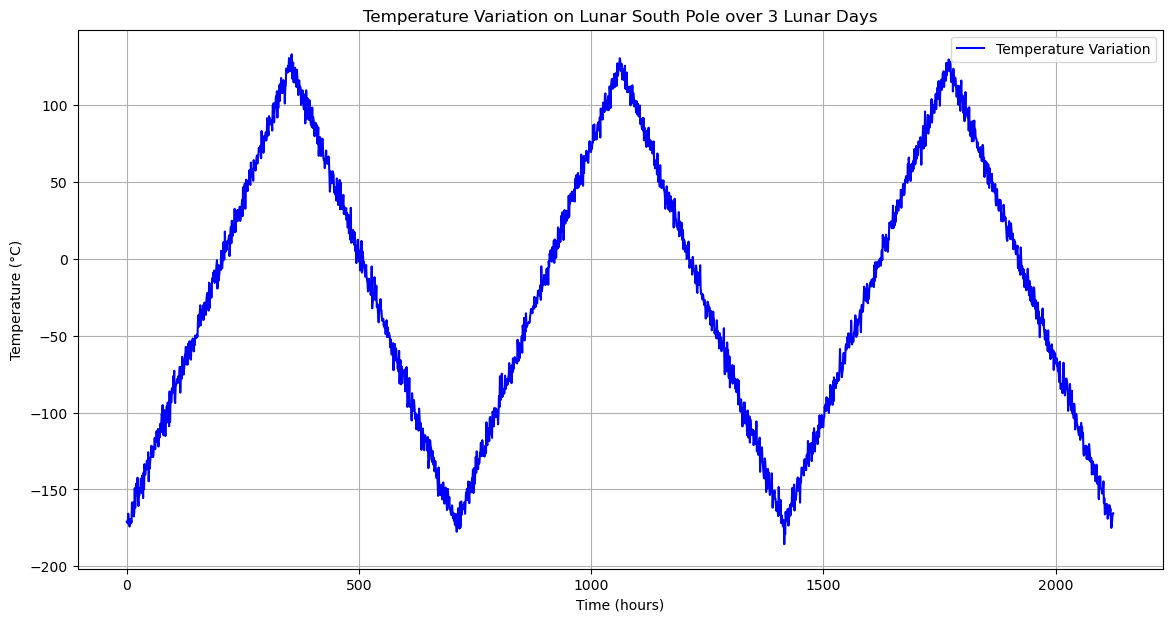

In [39]:
# Plot the temperature data
plt.figure(figsize=(14, 7))
plt.plot(time, recorded_data_from_file, label='Temperature Variation', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation on Lunar South Pole over 3 Lunar Days')
plt.legend()
plt.grid(True)
plt.show()

**Explanation**
1. Parameter Definition: We define the parameters for the simulation, including the duration of 3 lunar days in Earth days and the temperature range.
2. Generate Time Array: We create a time array representing the hourly data points over the entire period of 3 lunar days.
3. Temperature Variation Simulation: We simulate the temperature variation using a linear interpolation between the minimum night temperature and the maximum day temperature, repeating this cycle for 3 lunar days. We then add random noise to simulate real sensor data.
4. Save and Read Data: We save the simulated data to a file and then read it back to mimic the process of handling recorded data.
5. Plot the Data: We plot the synthetic temperature data to visualize the variation over 3 lunar days.

This approach provides a visual representation of how temperatures on the lunar south pole might vary over 3 lunar days, including both the day and night cycles. The model can be adjusted with more sophisticated temperature variations and noise models based on actual sensor data from lunar missions.